## Cats vs Dogs with **CNN**

Erstellen eines Modells zur Klassifizierung echter Bilder von Katzen und Hunden. Bilder aus der realen Welt haben auch unterschiedliche Formen, Seitenverhältnisse usw. und Sie müssen dies bei der Vorbereitung Ihrer Daten berücksichtigen.

In diesem Lab erfahren Sie zunächst, wie Sie CNNs erstellen, Ihre Daten mit **ImageDataGenerator** vorbereiten und Ihre Ergebnisse untersuchen. Gehen Sie folgendermaßen vor:

1.   Explore the example data of Dogs vs. Cats 
2.   Build and train a neural network to classify between the two pets
3.   Evaluate the training and validation accuracy

**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Running it on your local machine might result in some of the code blocks throwing errors.

# Datensatz herunterladen und überprufen

Sie beginnen mit dem Herunterladen des Datensatzes. Dies ist eine **ZIP-Datei** mit 2.000 JPG-Bildern von Katzen und Hunden. Es ist eine Teilmenge des Datensatzes „Dogs vs. Cats“, der auf **Kaggle** verfügbar ist und 25.000 Bilder enthält. Sie werden nur 2.000 des vollständigen Datensatzes verwenden, um die Trainingszeit für Bildungszwecke zu verkürzen.

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-02-26 09:49:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   221MB/s    in 0.3s    

2022-02-26 09:49:53 (221 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



Sie werden es dann in das aktuelle Verzeichnis extrahieren.

In [ ]:
import zipfile

# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

Wenn Sie sich erinnern, besteht der **Trainingssatz** aus den Daten, die verwendet werden, um dem neuronalen Netzwerkmodell mitzuteilen, dass „so eine Katze aussieht“ und „so ein Hund aussieht“. Das Validierungsset besteht aus Bildern von Katzen und Hunden, die das neuronale Netzwerk nicht als Teil des Trainings sehen wird. Sie können dies verwenden, um zu testen, wie gut oder wie schlecht es bei der Bewertung abschneidet, ob ein Bild eine Katze oder einen Hund enthält.

Diese Unterverzeichnisse enthalten wiederum jeweils **Katzen**- und **Hunde**-Unterverzeichnisse.

In [ ]:
import os

base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'vectorize.py', 'validation']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


Sie können jedem dieser Verzeichnisse eine Variable zuweisen, um es später zu verwenden.

In [ ]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Sehen Sie sich nun an, wie die Dateinamen in den Zugverzeichnissen für Katzen und Hunde aussehen (die Dateinamenskonventionen sind im Validierungsverzeichnis gleich):

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.361.jpg', 'cat.868.jpg', 'cat.696.jpg', 'cat.787.jpg', 'cat.47.jpg', 'cat.600.jpg', 'cat.454.jpg', 'cat.724.jpg', 'cat.416.jpg', 'cat.674.jpg']
['dog.896.jpg', 'dog.511.jpg', 'dog.155.jpg', 'dog.976.jpg', 'dog.468.jpg', 'dog.837.jpg', 'dog.924.jpg', 'dog.891.jpg', 'dog.698.jpg', 'dog.779.jpg']


Lassen Sie uns die Gesamtzahl der Katzen- und Hundebilder in den Zug- und Validierungsverzeichnissen herausfinden:

In [ ]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


Sowohl für Katzen als auch für Hunde stehen Ihnen 1.000 Trainingsbilder und 500 Validierungsbilder zur Verfügung.

Schauen Sie sich jetzt ein paar Bilder an, um ein besseres Gefühl dafür zu bekommen, wie die Katzen- und Hundedatensätze aussehen. Konfigurieren Sie zunächst die **Matplotlib**-Parameter:

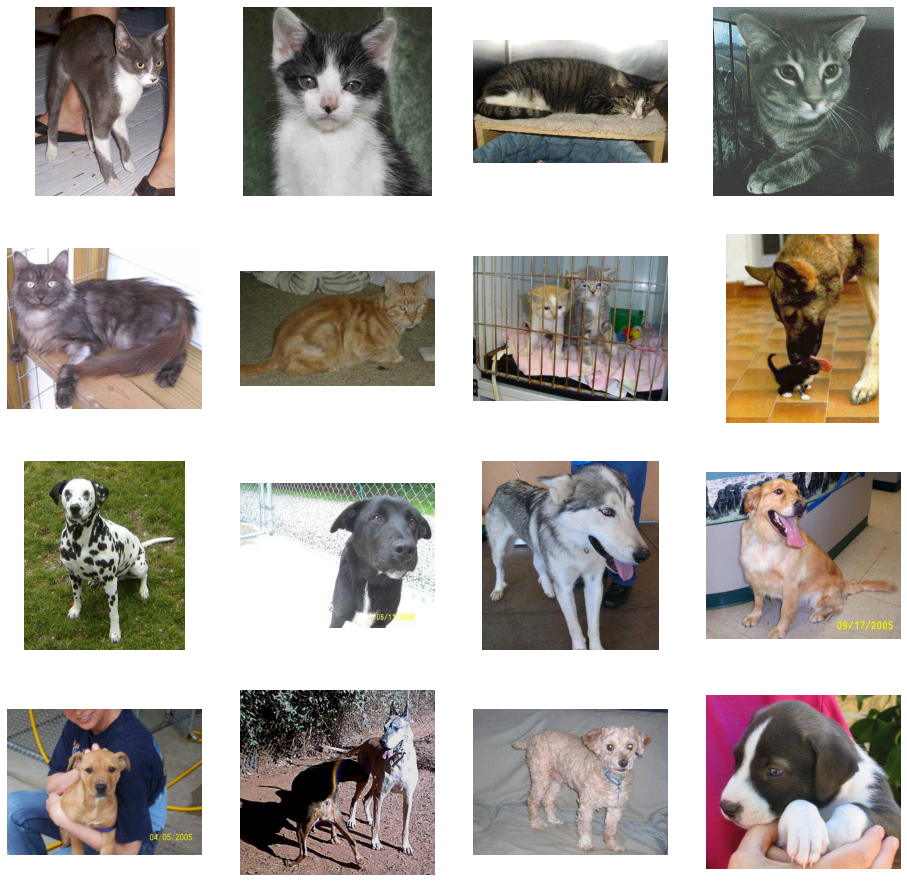

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Modellerstellung

Erstellen eines kleinen Modells von Grund auf neu, um eine **Genauigkeit** von **~72 %** zu erreichen

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Beachten Sie, dass die Eingabeform die gewünschte Größe des Bildes 150 x 150 mit 3 Bytes Farbe ist
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten die Ergebnisse to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Nur 1 Ausgangsneuron. Es enthält einen Wert von 0-1, wobei 0 für eine Klasse ('Katzen') und 1 für die andere ('Hunde')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

Beachten Sie, dass Sie das Netzwerk mit einer **Sigmoid-Aktivierung** beenden, da Sie mit einem Zwei-Klassen-Klassifizierungsproblem konfrontiert sind, dh einem **binären Klassifizierungsproblem**. Die Ausgabe des Netzwerks ist ein einzelner Skalar zwischen 0 und 1, der die Wahrscheinlichkeit codiert, dass das aktuelle Bild Klasse 1 ist (im Gegensatz zu Klasse 0).

Sie können die Architektur des Netzwerks mit der Methode** model.summary() **überprüfen:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

Als Nächstes konfigurieren Sie die Spezifikationen für das Modelltraining. Sie werden unser Modell mit dem Verlust von **binary_crossentropy** trainieren, da es sich um ein** binäres Klassifizierungsproblem** handelt und Ihre endgültige Aktivierung ein **Sigmoid** ist. Wir verwenden den **rmsprop-Optimierer** mit einer **Lernrate von 0,001**. Während des Trainings sollten Sie die Klassifizierungsgenauigkeit überwachen.

**HINWEIS**: In diesem Fall ist die Verwendung des RMSprop-Optimierungsalgorithmus dem stochastischen Gradientenabstieg (SGD) vorzuziehen, da RMSprop die Optimierung der Lernrate für uns automatisiert. (Andere Optimierer wie Adam und Adagrad passen die Lernrate auch automatisch während des Trainings an und würden hier genauso gut funktionieren.)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

# Datenvorverarbeitung

Daten, die in neuronale Netzwerke gelangen, sollten normalerweise auf irgendeine Weise **normalisiert** werden, um sie für die Verarbeitung durch das Netzwerk zugänglicher zu machen

In **Keras** kann dies über die Klasse keras.preprocessing.image.**ImageDataGenerator** mit dem Parameter **rescale** erfolgen. Mit dieser ImageDataGenerator-Klasse können Sie Generatoren erweiterter Bildstapel (und ihrer Labels) über **.flow(data, labels)** oder **.flow_from_directory(directory)** instanziieren.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Training

Sie trainieren nun mit allen 2.000 verfügbaren Bildern für **15 Epochen** und überwachen die Genauigkeit auch mit den 1.000 Bildern im Validierungssatz.

In [ ]:
history = model.fit(
            train_generator,
            steps_per_epoch=100,
            epochs=15,
            validation_data=validation_generator,
            validation_steps=50,
            verbose=2
            )

Epoch 1/15
100/100 - 59s - loss: 0.8036 - accuracy: 0.5785 - val_loss: 0.6734 - val_accuracy: 0.5780 - 59s/epoch - 588ms/step
Epoch 2/15
100/100 - 57s - loss: 0.6600 - accuracy: 0.6475 - val_loss: 0.6797 - val_accuracy: 0.5820 - 57s/epoch - 568ms/step
Epoch 3/15
100/100 - 57s - loss: 0.5549 - accuracy: 0.7180 - val_loss: 0.6282 - val_accuracy: 0.6820 - 57s/epoch - 567ms/step
Epoch 4/15
100/100 - 57s - loss: 0.4587 - accuracy: 0.7940 - val_loss: 0.5998 - val_accuracy: 0.7030 - 57s/epoch - 569ms/step
Epoch 5/15
100/100 - 57s - loss: 0.3579 - accuracy: 0.8460 - val_loss: 0.7113 - val_accuracy: 0.6920 - 57s/epoch - 571ms/step
Epoch 6/15
100/100 - 58s - loss: 0.3080 - accuracy: 0.8835 - val_loss: 1.2013 - val_accuracy: 0.6220 - 58s/epoch - 580ms/step
Epoch 7/15
100/100 - 59s - loss: 0.2077 - accuracy: 0.9195 - val_loss: 1.0016 - val_accuracy: 0.6940 - 59s/epoch - 591ms/step
Epoch 8/15
100/100 - 58s - loss: 0.1413 - accuracy: 0.9495 - val_loss: 1.1842 - val_accuracy: 0.7130 - 58s/epoch - 578

# Modellvorhersage

Sehen Sie sich nun an, wie Sie mithilfe des Modells tatsächlich eine Vorhersage ausführen. Dieser Code ermöglicht es Ihnen, eine oder mehrere Dateien aus Ihrem Dateisystem auszuwählen, sie hochzuladen und sie durch das Modell laufen zu lassen, wobei angezeigt wird, ob es sich bei dem Objekt um eine Katze oder einen Hund handelt.

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving best-girl-cat-names-1606245046.jpg to best-girl-cat-names-1606245046.jpg
[0.05262753]
best-girl-cat-names-1606245046.jpg is a cat


# Bewertung von Genauigkeit und Verlust für das Modell

Text(0.5, 1.0, 'Training and validation loss')

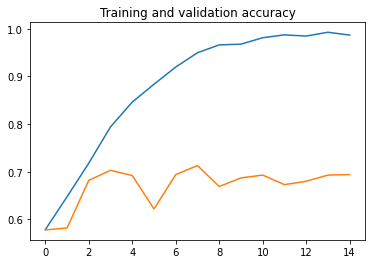

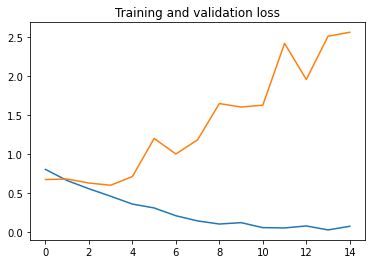

In [ ]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

As you can see, the model is **overfitting**. Die Trainingsgenauigkeit (in Blau) nähert sich 100 %, während die Validierungsgenauigkeit (in Orange) bei 70 % stagniert.

# Vermeidung **Overfitting**

Um overfitting zu vermeiden, gibt es verschiedene Techniken, Sie können **mehr** **Datensätze** oder **data Augmentation** verwenden

# Data Augmentation

wie kann eine **Overfitting** durch Datenaugmentation vermeidet werden. Dadurch wird die Menge der **Trainingsdaten** erhöht, indem die Eigenschaften der vorhandenen Trainingsdaten geändert werden. Beispielsweise können Sie bei Bilddaten verschiedene Vorverarbeitungstechniken wie Drehen, Spiegeln, Scheren oder Zoomen auf Ihre vorhandenen Bilder anwenden, um andere Daten zu simulieren, von denen das Modell ebenfalls lernen soll. Auf diese Weise würde das Modell während des Trainings mehr Vielfalt in den Bildern sehen, sodass es besser auf neue, zuvor nicht sichtbare Daten schließen kann.